In [1]:
#Epsilon Greedy, it is a solution to Explore-Exploit Dilemma, i.e A/B Testing vs Human Emotion
'''
pseudo code
p = random()
if (p < eps)
    pull random arm
else
    pull current best arm
'''
import numpy as np
import matplotlib.pyplot as plt

In [63]:
class Bandit:
    def __init__(self, m):
        #true mean
        self.m = m
        #our calculated mean
        self.mean = 0
        #iterations
        self.N = 0
    
    def pullArm(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        self.mean = (1.0-1.0/self.N)*self.mean + (1.0/self.N)*x

In [80]:
def experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    armSelectionData = np.empty(N)
    for i in range(N):
        randomNumber = np.random.random()
        if (randomNumber < eps):
            arm = np.random.choice(3)
        else:
            arm = np.argmax([b.mean for b in bandits])
            #print (bandits[arm].mean)
            #print (arm)
        armSelectionData[i] = arm
        value = bandits[arm].pullArm()
        bandits[arm].update(value)
        data[i] = value
        
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    # plot moving average ctr
    plt.plot(cumulative_average)
    #plt.plot(armSelectionData + 1)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    #plt.xscale('log')
    plt.show()
    #print(armSelectionData + 1)
    for b in bandits:
        print(b.mean)

    return cumulative_average

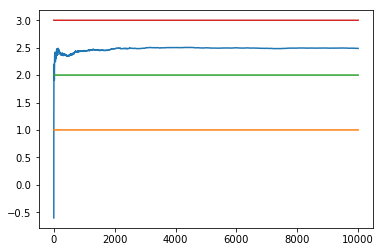

1.02621045864386
2.004516012586261
2.990677534967577


In [81]:
if __name__ == '__main__':
    c_1 = experiment(1.0, 2.0, 3.0, 0.5, 10000)

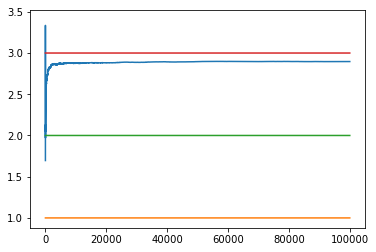

1.0023096774052576
2.008032646478316
2.9970833367482417


In [88]:
    c_05 = experiment(1.0, 2.0, 3.0, 0.1, 100000)

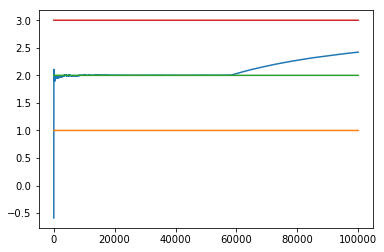

-0.7362272882636945
2.00272688425393
3.0038573190759488


In [85]:
    c_01 = experiment(1.0, 2.0, 3.0, 0.0001, 100000)
    #with small values of eps, the estimated means would not be very constant, 
    #since there would be very less chances of experimenting different values and 
    #once one arm gains an edge, mean for others would hard to predict

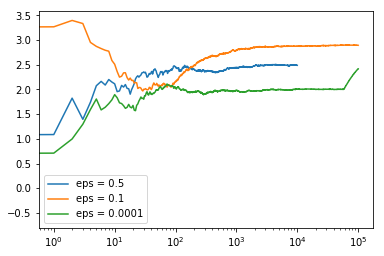

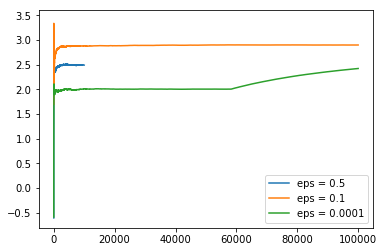

In [89]:
    # log scale plot
    plt.plot(c_1, label='eps = 0.5')
    plt.plot(c_05, label='eps = 0.1')
    plt.plot(c_01, label='eps = 0.0001')
    plt.legend()
    plt.xscale('log')
    plt.show()


    # linear plot
    plt.plot(c_1, label='eps = 0.5')
    plt.plot(c_05, label='eps = 0.1')
    plt.plot(c_01, label='eps = 0.0001')
    plt.legend()
    plt.show()

In [20]:
dataa = [1,2,3,4]
print (np.cumsum(dataa))
print (np.arange(4) + 1)

[ 1  3  6 10]
[1 2 3 4]


In [19]:
print (np.cumsum(dataa) / (np.arange(4) + 1))

[ 1.   1.5  2.   2.5]


In [79]:
b = [1,2,3,4]
print(np.argmax([x for x in b]))

3
